In [32]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist




In [31]:
#preprocessing and loading the data
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

#reshaping the data
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

#model building
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 78s 41ms/step - loss: 1.1574 - accuracy: 0.8460
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2903 - accuracy: 0.8969
Epoch 3/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2557 - accuracy: 0.9075
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2296 - accuracy: 0.9161
Epoch 5/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2142 - accuracy: 0.9216


313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.77      0.81      1000
           3       0.91      0.88      0.89      1000
           4       0.83      0.82      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.63      0.80      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



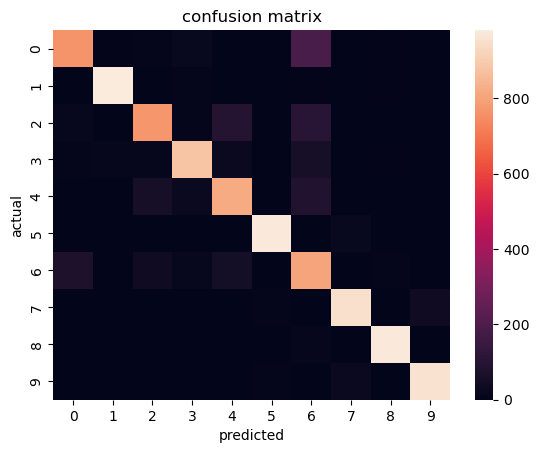

In [52]:
loss=model.evaluate(x_test,y_test)
y_pred=model.predict(x_test)
y_pred_labels=np.argmax(y_pred,axis=1)


report=classification_report(y_test,y_pred_labels)
print(report)

confusion=confusion_matrix(y_test,y_pred_labels)
# Visualize confusion matrix

sns.heatmap(confusion)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

